### Modeling

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler


- from Local Computer

In [2]:
df = pd.read_csv('/Users/leahchen/Documents/LHL/Final Project/Time-Series-Forecasting/data/cleaned_04_00.csv')

In [3]:
df.head()

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,CreatedAt,...,week_of_year,price_difference,morning,afternoon,evening,avg_sales_country_product_day,total_orders,total_products,average_orders_per_day,average_products_per_day
0,1900078757,2019-06-01,COD,ZB00049340,5,0.0,6.63,2.50,7.78,2019-06-01 00:04:00,...,22,-1.15,0,0,0,37.39,55,154,965.290188,2286.687891
1,1900078757,2019-06-01,COD,S113,1,0.0,0.93,0.00,0.93,2019-06-01 00:04:00,...,22,0.00,0,0,0,1.57,55,154,965.290188,2286.687891
2,1900078757,2019-06-01,COD,ZB00007426,2,0.0,6.63,0.07,7.78,2019-06-01 00:04:00,...,22,-1.15,0,0,0,37.39,55,154,965.290188,2286.687891
3,1900078757,2019-06-01,COD,S101,1,0.0,2.21,0.00,2.21,2019-06-01 00:04:00,...,22,0.00,0,0,0,1.57,55,154,965.290188,2286.687891
4,1900072959,2019-06-01,GOPAY_CARD,ZB00010308,4,0.0,19.18,11.62,33.08,2019-06-01 00:09:00,...,22,-13.90,0,0,0,52.58,55,154,965.290188,2286.687891


In [4]:
# Convert 'date' and 'CreatedAt' to datetime objects
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.columns

Index(['order_id', 'date', 'payment', 'item_code', 'quantity', 'gift_quantity',
       'unit_price_vat_excl', 'unit_cogs', 'unit_rrp_vat_excl', 'CreatedAt',
       'country', 'brand_id', 'name', 'group0_id', 'group0', 'category',
       'gender', 'age', 'color', 'size', 'gross_revenue', 'profit',
       'add_on_products', 'day_of_week', 'month_of_year', 'hour_of_day',
       'year', 'week_of_year', 'price_difference', 'morning', 'afternoon',
       'evening', 'avg_sales_country_product_day', 'total_orders',
       'total_products', 'average_orders_per_day', 'average_products_per_day'],
      dtype='object')

In [6]:
df1 = df.drop(columns=['payment', 'item_code', 'gift_quantity',
                      'unit_rrp_vat_excl', 'CreatedAt','country',
                      'name', 'group0', 'category','gender', 'age','color', 'size','year',
                       'profit','week_of_year','morning', 'afternoon','evening', 'avg_sales_country_product_day', 
                      'total_orders','total_products', 'average_orders_per_day', 'average_products_per_day',
                      'day_of_week','month_of_year','hour_of_day'
                      ])
df1.head()

,order_id,date,quantity,unit_price_vat_excl,unit_cogs,brand_id,group0_id,gross_revenue,add_on_products,price_difference
0,1900078757,2019-06-01,5,6.63,2.50,84,200,33.153101,0,-1.15
1,1900078757,2019-06-01,1,0.93,0.00,11,999,0.929070,1,0.00
2,1900078757,2019-06-01,2,6.63,0.07,84,200,13.261240,0,-1.15
3,1900078757,2019-06-01,1,2.21,0.00,11,999,2.210078,1,0.00
4,1900072959,2019-06-01,4,19.18,11.62,84,200,76.730525,0,-13.90


In [8]:
df1.columns

Index(['order_id', 'date', 'quantity', 'unit_price_vat_excl', 'unit_cogs',
       'brand_id', 'group0_id', 'gross_revenue', 'add_on_products',
       'price_difference'],
      dtype='object')

In [12]:
# Group the data by month and sum the gross_revenue
monthly_gross_revenue = df.groupby(pd.Grouper(key='date', freq='M')).sum()['gross_revenue'].reset_index()

# Set the date to the first day of the month
monthly_gross_revenue['date'] = monthly_gross_revenue['date'].apply(lambda x: x.replace(day=1))

monthly_gross_revenue['gross_revenue'] = monthly_gross_revenue['gross_revenue'].round(2)
monthly_gross_revenue


/var/folders/zv/fr0wdk0579q6_dc92zfqx36w0000gn/T/ipykernel_27870/4225865616.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_gross_revenue = df.groupby(pd.Grouper(key='date', freq='M')).sum()['gross_revenue'].reset_index()


,date,gross_revenue
0,2019-06-01,656395.71
1,2019-07-01,1072110.21
2,2019-08-01,1509171.68
3,2019-09-01,1321559.20
4,2019-10-01,1081337.47
5,2019-11-01,1771054.22
6,2019-12-01,1828286.77
7,2020-01-01,1422754.71
8,2020-02-01,1268077.61
9,2020-03-01,1190448.86


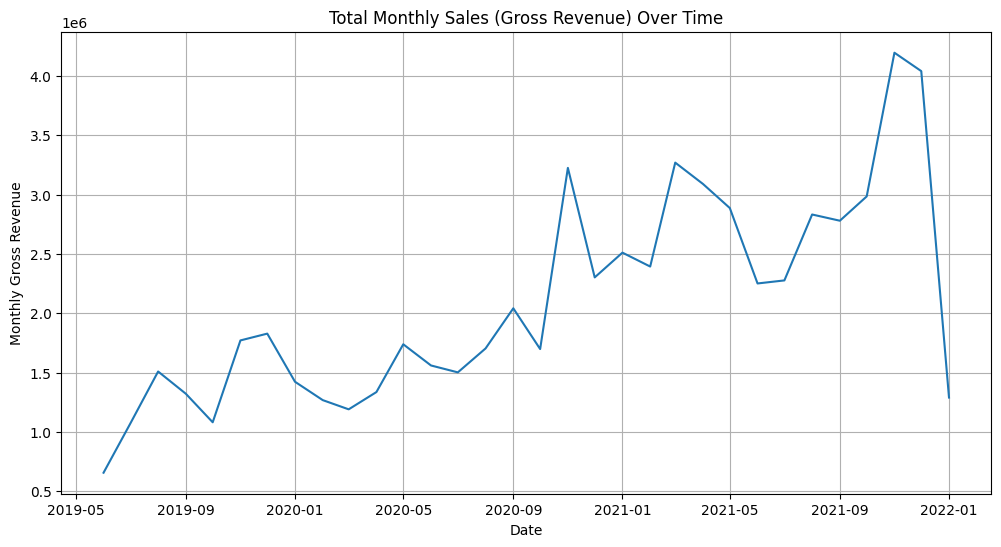

In [13]:
# Plot the monthly gross revenue over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_gross_revenue['date'], monthly_gross_revenue['gross_revenue'])
plt.xlabel('Date')
plt.ylabel('Monthly Gross Revenue')
plt.title('Total Monthly Sales (Gross Revenue) Over Time')
plt.grid()
plt.show()


In [19]:
def get_diff(data):
    # Calculate the differences between monthly sales
    data['sales_diff'] = data['gross_revenue'].diff()

    # Drop the NaN values
    data = data.dropna()

    # Save the dataframe to a CSV file
    data.to_csv('/Users/leahchen/Documents/LHL/Final Project/Time-Series-Forecasting/data/monthly_df.csv', index=False)

    return data

stationary_df = get_diff(monthly_gross_revenue)


In [20]:
stationary_df

,date,gross_revenue,sales_diff
1,2019-07-01,1072110.21,415714.50
2,2019-08-01,1509171.68,437061.47
3,2019-09-01,1321559.20,-187612.48
4,2019-10-01,1081337.47,-240221.73
5,2019-11-01,1771054.22,689716.75
6,2019-12-01,1828286.77,57232.55
7,2020-01-01,1422754.71,-405532.06
8,2020-02-01,1268077.61,-154677.10
9,2020-03-01,1190448.86,-77628.75
10,2020-04-01,1335987.43,145538.57


In [22]:
# Remove the row with date '2022-01-01' from monthly_gross_revenue
monthly_gross_revenue = monthly_gross_revenue[monthly_gross_revenue['date'] != '2022-01-01']

# Remove the row with date '2022-01-01' from stationary_df
stationary_df = stationary_df[stationary_df['date'] != '2022-01-01']


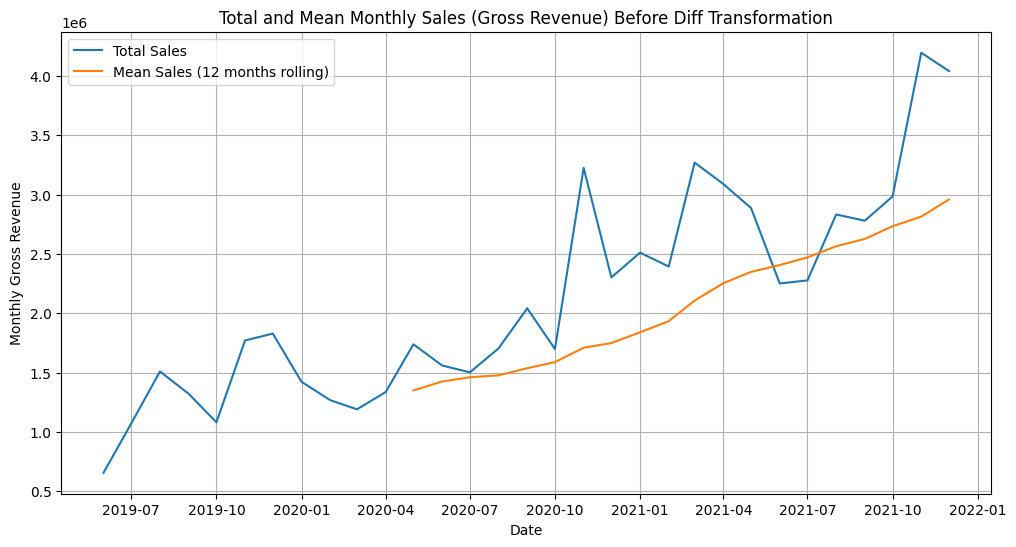

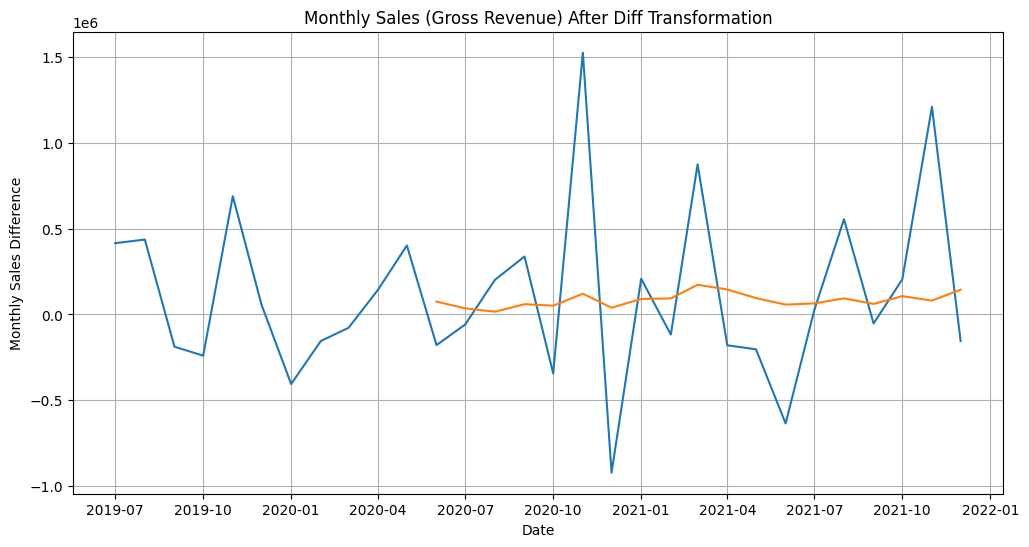

In [24]:
# Plot the total and mean monthly sales before diff transformation
plt.figure(figsize=(12, 6))
plt.plot(monthly_gross_revenue['date'], monthly_gross_revenue['gross_revenue'], label='Total Sales')
plt.plot(monthly_gross_revenue['date'], monthly_gross_revenue['gross_revenue'].rolling(window=12).mean(), label='Mean Sales (12 months rolling)')
plt.xlabel('Date')
plt.ylabel('Monthly Gross Revenue')
plt.title('Total and Mean Monthly Sales (Gross Revenue) Before Diff Transformation')
plt.legend()
plt.grid()
plt.show()

# Plot the monthly sales after diff transformation
plt.figure(figsize=(12, 6))
plt.plot(stationary_df['date'], stationary_df['sales_diff'])
plt.plot(stationary_df['date'], stationary_df['sales_diff'].rolling(window=12).mean(), label='Mean Sales (12 months rolling)')
plt.xlabel('Date')
plt.ylabel('Monthly Sales Difference')
plt.title('Monthly Sales (Gross Revenue) After Diff Transformation')
plt.grid()
plt.show()


In [25]:
def generate_arima_data(data):
    # Set the 'date' column as the index and keep only the 'sales_diff' column
    dt_data = data.set_index('date')[['sales_diff']]

    # Drop the NaN values (if any)
    dt_data = dt_data.dropna(axis=0)

    # Save the dataframe to a CSV file
    dt_data.to_csv('/Users/leahchen/Documents/LHL/Final Project/Time-Series-Forecasting/data/arima_df.csv')

    return dt_data

arima_datetime = generate_arima_data(stationary_df)


<Figure size 1200x600 with 0 Axes>

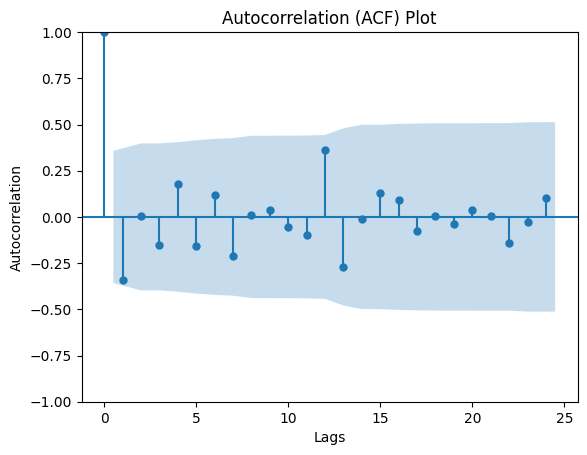

In [100]:
# Plot the Autocorrelation (ACF) plot
plt.figure(figsize=(12, 6))
plot_acf(arima_datetime['sales_diff'], lags=24)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation (ACF) Plot')
plt.show()


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

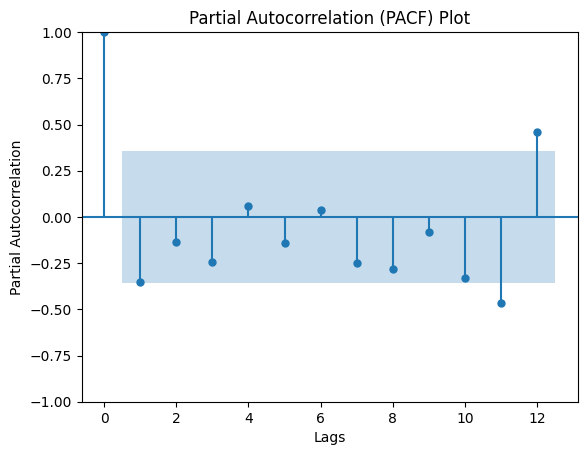

In [97]:
# Plot the Partial Autocorrelation (PACF) plot
plt.figure(figsize=(12, 6))
plot_pacf(arima_datetime['sales_diff'], lags=12)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation (PACF) Plot')
plt.show()

In [58]:
# Group by date and sum the 'gross_revenue' column
daily_total_sales = df1.groupby('date')['gross_revenue'].sum().reset_index()

daily_total_sales['gross_revenue'] = daily_total_sales['gross_revenue'].round(2)

# Set the date column as index
daily_total_sales.set_index('date', inplace=True)

# Resample the data to weekly frequency and sum the gross revenue for each week
weekly_total_sales = daily_total_sales['gross_revenue'].resample('W').sum()
weekly_total_sales = weekly_total_sales.reset_index()

weekly_total_sales.head()

,date,gross_revenue
0,2019-06-02,4132.37
1,2019-06-09,167977.17
2,2019-06-16,134726.56
3,2019-06-23,213229.93
4,2019-06-30,136329.67


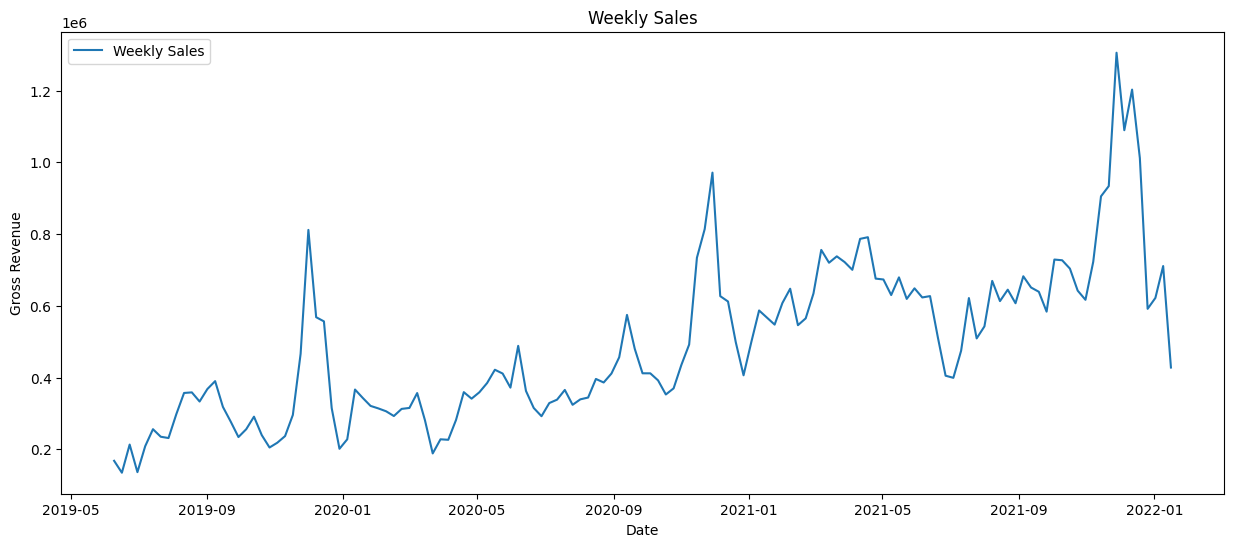

In [105]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plot the weekly sales
plt.plot(weekly_total_sales['date'], weekly_total_sales['gross_revenue'], label='Weekly Sales')

# Set the title and labels for the plot
plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Gross Revenue')

# Display the legend
plt.legend()

# Show the plot
plt.show()


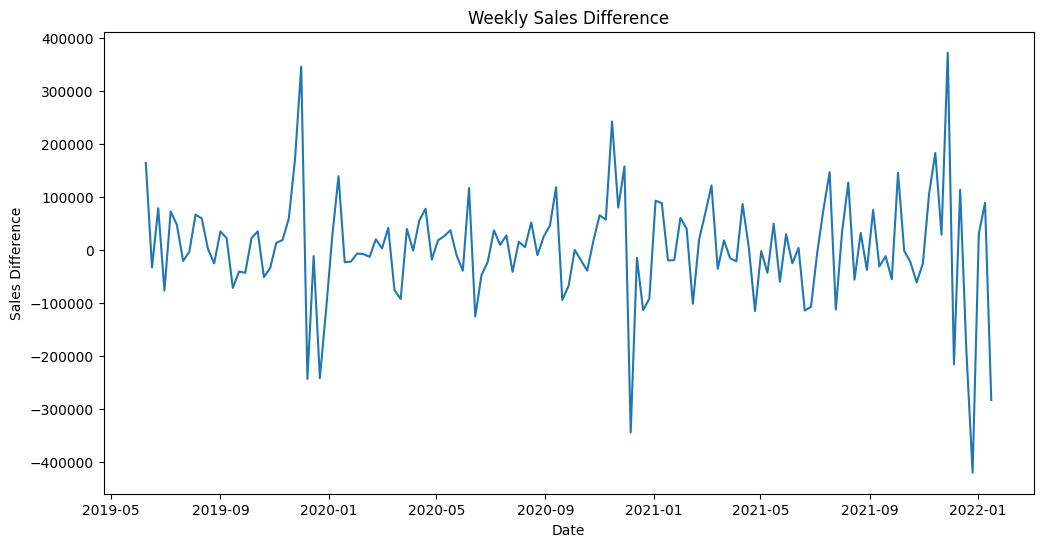

In [59]:
# Calculate the difference
weekly_total_sales['sales_diff'] = weekly_total_sales['gross_revenue'].diff()
weekly_total_sales = weekly_total_sales.dropna()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(weekly_total_sales['date'], weekly_total_sales['sales_diff'])
plt.xlabel('Date')
plt.ylabel('Sales Difference')
plt.title('Weekly Sales Difference')
plt.show()


In [96]:
 # Save the dataframe to a CSV file
weekly_total_sales.to_csv('/Users/leahchen/Documents/LHL/Final Project/Time-Series-Forecasting/data/weekly_df.csv', index=False)

<Figure size 1200x600 with 0 Axes>

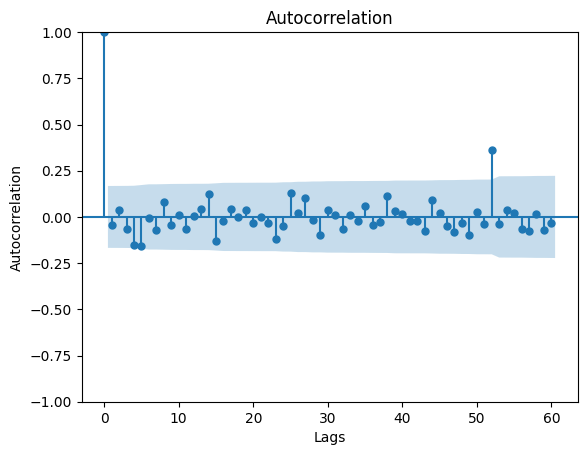

<Figure size 1200x600 with 0 Axes>

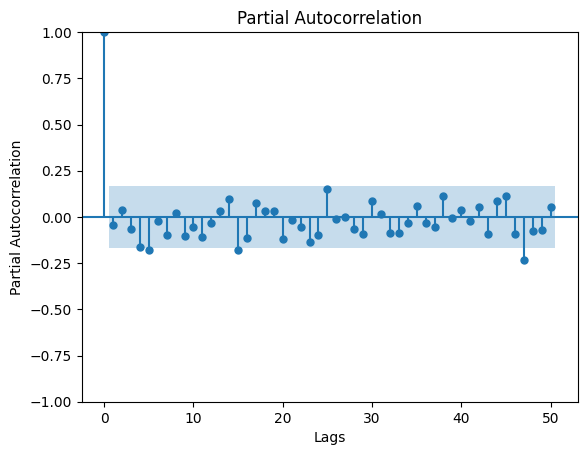

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the Autocorrelation (ACF) plot
plt.figure(figsize=(12, 6))
plot_acf(weekly_total_sales['sales_diff'], lags=60)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot the Partial Autocorrelation (PACF) plot
plt.figure(figsize=(12, 6))
plot_pacf(weekly_total_sales['sales_diff'], lags=50)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.94601D-01    |proj g|=  3.21975D-02


 This problem is unconstrained.



At iterate    5    f=  4.80190D-01    |proj g|=  2.15329D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18      6      8      1     0     0   1.741D-06   4.802D-01
  F =  0.48018965231722793     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


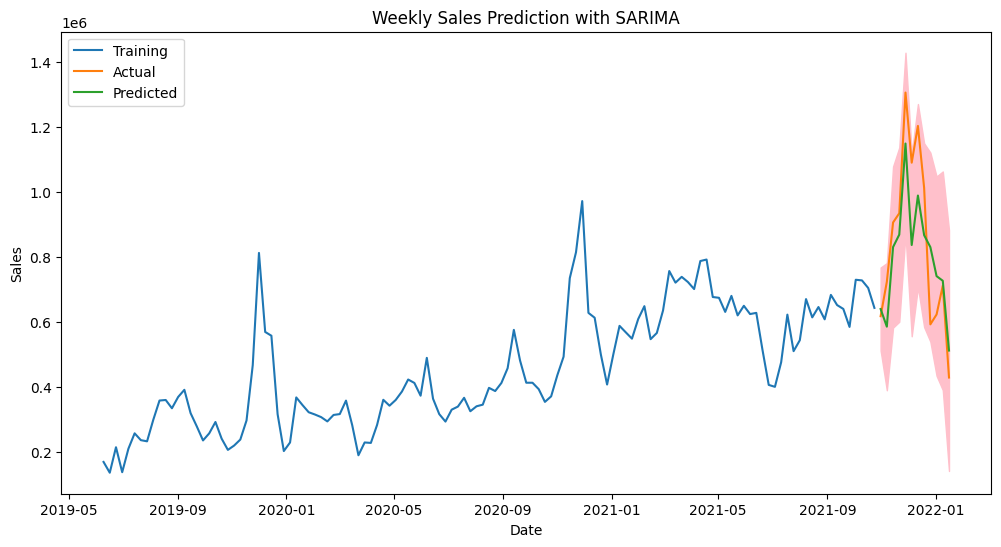

In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Split the data into training and testing sets
train_data = weekly_total_sales[:-12]  # Use all but the last 6 weeks for training
test_data = weekly_total_sales[-12:]   # Use the last 6 weeks for testing

# Step 2: Fit the SARIMA model
model = SARIMAX(train_data['gross_revenue'],
                order=(15, 1, 0),              # (p, d, q) - PACF, I, and ACF values
                seasonal_order=(1, 1, 1, 52),  # (P, D, Q, S) - seasonal parameters
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Step 3: Evaluate the model using the testing set
predictions = results.get_forecast(steps=len(test_data))
predicted_sales = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data['gross_revenue'], label='Training')
plt.plot(test_data['date'], test_data['gross_revenue'], label='Actual')
plt.plot(test_data['date'], predicted_sales, label='Predicted')
plt.fill_between(test_data['date'], confidence_intervals['lower gross_revenue'],
                 confidence_intervals['upper gross_revenue'], color='pink')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Weekly Sales Prediction with SARIMA')
plt.legend()
plt.show()




In [108]:
# Calculate RMSE, MAE, and R2
rmse = np.sqrt(mean_squared_error(test_data['gross_revenue'], predicted_sales))
mae = mean_absolute_error(test_data['gross_revenue'], predicted_sales)
r2 = r2_score(test_data['gross_revenue'], predicted_sales)
print("Weekly Sales Prediction with SARIMA")
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')


Weekly Sales Prediction with SARIMA
RMSE: 148174.54
MAE: 127216.82
R2: 0.68


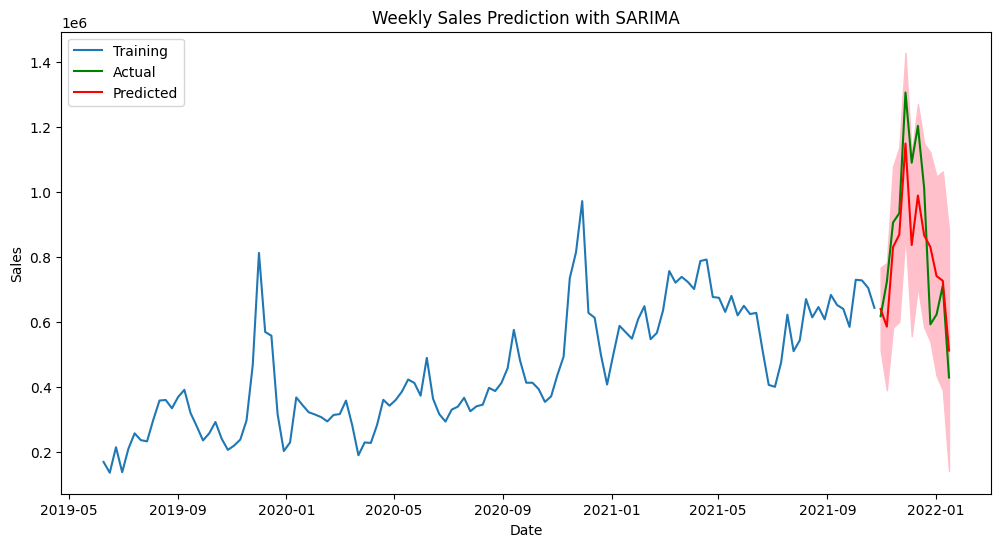

In [106]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data['gross_revenue'], label='Training')
plt.plot(test_data['date'], test_data['gross_revenue'], label='Actual', color='green')
plt.plot(test_data['date'], predicted_sales, label='Predicted', color='red')
plt.fill_between(test_data['date'], confidence_intervals['lower gross_revenue'],
                 confidence_intervals['upper gross_revenue'], color='pink')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Weekly Sales Prediction with SARIMA')
plt.legend()
plt.show()

In [73]:
# Create a dataset with lagged features
def create_lagged_features(df, n_lags=52):
    data = df.copy()
    for i in range(1, n_lags + 1):
        data[f'lag_{i}'] = data['gross_revenue'].shift(i)
    data.dropna(inplace=True)
    return data

lagged_data = create_lagged_features(weekly_total_sales)

In [76]:
lagged_data.head()

,date,gross_revenue,sales_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50,lag_51,lag_52
53,2020-06-07,488479.82,116517.33,371962.49,411216.16,421819.16,384788.44,358936.64,341198.88,359353.34,...,357058.50,297719.16,231422.58,235050.26,256059.58,208708.82,136329.67,213229.93,134726.56,167977.17
54,2020-06-14,362761.27,-125718.55,488479.82,371962.49,411216.16,421819.16,384788.44,358936.64,341198.88,...,358718.62,357058.50,297719.16,231422.58,235050.26,256059.58,208708.82,136329.67,213229.93,134726.56
55,2020-06-21,315216.14,-47545.13,362761.27,488479.82,371962.49,411216.16,421819.16,384788.44,358936.64,...,333243.81,358718.62,357058.50,297719.16,231422.58,235050.26,256059.58,208708.82,136329.67,213229.93
56,2020-06-28,292245.85,-22970.29,315216.14,362761.27,488479.82,371962.49,411216.16,421819.16,384788.44,...,368037.42,333243.81,358718.62,357058.50,297719.16,231422.58,235050.26,256059.58,208708.82,136329.67
57,2020-07-05,328931.90,36686.05,292245.85,315216.14,362761.27,488479.82,371962.49,411216.16,421819.16,...,390074.36,368037.42,333243.81,358718.62,357058.50,297719.16,231422.58,235050.26,256059.58,208708.82


In [74]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(lagged_data, test_size=0.1, shuffle=False)

In [75]:
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.drop(['date', 'gross_revenue'], axis=1))
test_scaled = scaler.transform(test_data.drop(['date', 'gross_revenue'], axis=1))

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.2)
xgb_model.fit(train_scaled, train_data['gross_revenue'])

# Step 5: Evaluate the model using the testing set
predictions = xgb_model.predict(test_scaled)


In [77]:
# Calculate evaluation metrics (RMSE, MAE, R2)
rmse = np.sqrt(mean_squared_error(test_data['gross_revenue'], predictions))
mae = mean_absolute_error(test_data['gross_revenue'], predictions)
r2 = r2_score(test_data['gross_revenue'], predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

RMSE: 277852.93663557986
MAE: 221081.42805555553
R2: 0.0510415408297662


In [83]:
# Set up a parameter grid for XGBoost
param_grid = {
    'n_estimators': [200,300,400],
    'learning_rate': [0.01,0.1, 0.2, 0.3],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5]
}

# Use GridSearchCV to find the best hyperparameters
xgb_model = XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(train_scaled, train_data['gross_revenue'])
best_params = grid_search.best_params_

# Train the XGBoost model with the best hyperparameters
xgb_best = XGBRegressor(**best_params)
xgb_best.fit(train_scaled, train_data['gross_revenue'])

# Predict using the test set
predictions = xgb_best.predict(test_scaled)



RMSE: 279116.41675586585
MAE: 223954.73472222217
R2: 0.04239152441836225


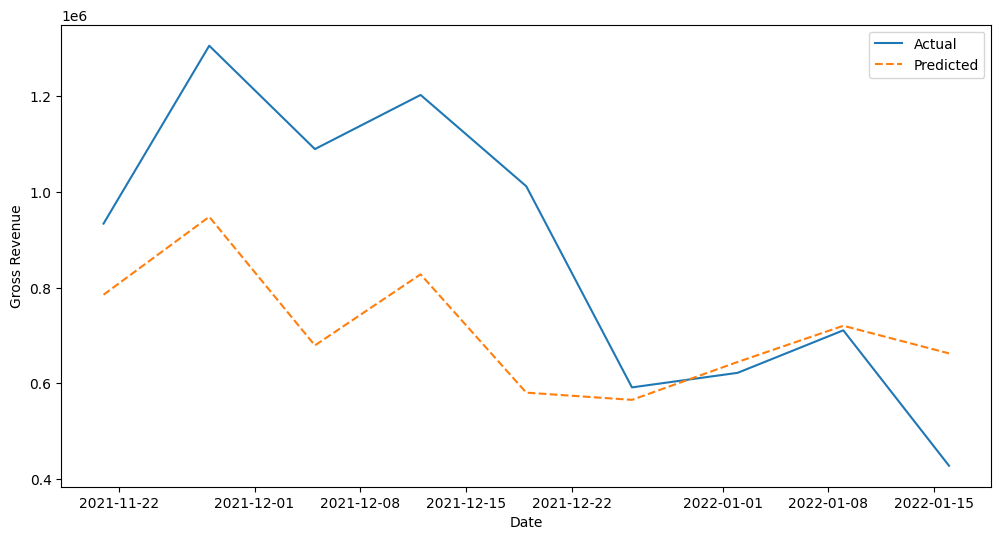

In [84]:
# Calculate evaluation metrics (RMSE, MAE, R2)
rmse = np.sqrt(mean_squared_error(test_data['gross_revenue'], predictions))
mae = mean_absolute_error(test_data['gross_revenue'], predictions)
r2 = r2_score(test_data['gross_revenue'], predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

# Plot the predicted values along with the actual data
plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], test_data['gross_revenue'], label='Actual')
plt.plot(test_data['date'], predictions, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gross Revenue')
plt.legend()
plt.show()


RMSE: 298836.8523071453
MAE: 242973.80159100436
R2: -0.09770470486379645


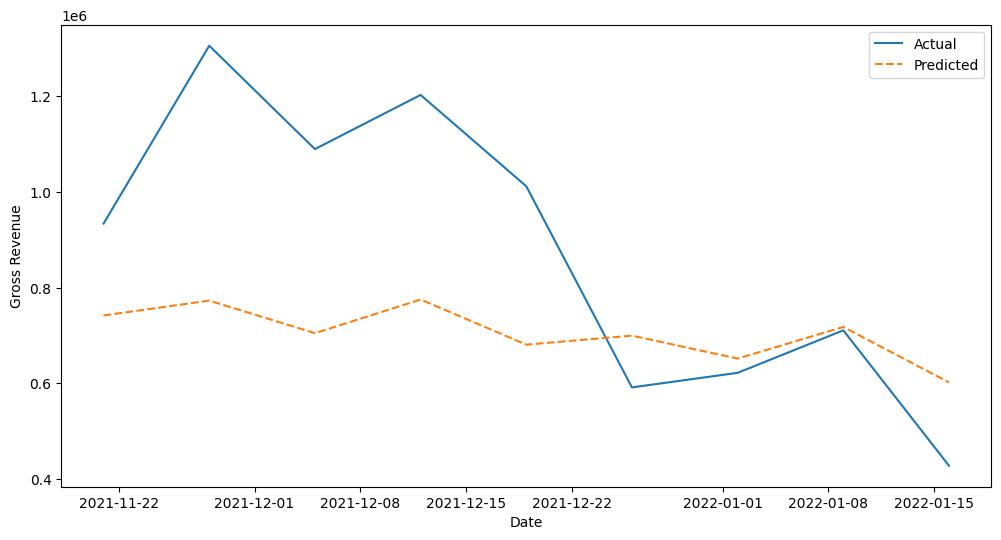

In [80]:
# Set up a parameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(train_scaled, train_data['gross_revenue'])
best_params = grid_search.best_params_

# Train the Random Forest model with the best hyperparameters
rf_best = RandomForestRegressor(**best_params)
rf_best.fit(train_scaled, train_data['gross_revenue'])

# Predict using the test set
predictions = rf_best.predict(test_scaled)

# Calculate evaluation metrics (RMSE, MAE, R2)
rmse = np.sqrt(mean_squared_error(test_data['gross_revenue'], predictions))
mae = mean_absolute_error(test_data['gross_revenue'], predictions)
r2 = r2_score(test_data['gross_revenue'], predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

# Plot the predicted values along with the actual data
plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], test_data['gross_revenue'], label='Actual')
plt.plot(test_data['date'], predictions, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gross Revenue')
plt.legend()
plt.show()
